In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('inputs/USDJPY_M5.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close'), usecols=[0, 1, 2, 3, 4, 5], skiprows=1)
data['datetime'] = pd.to_datetime(data['date']  + ' ' + data['time'])
data.drop(['date', 'time'], axis=1, inplace=True)
data

,open,high,low,close,datetime
0,107.547,107.547,107.455,107.487,2020-04-01 00:00:00
1,107.487,107.537,107.467,107.537,2020-04-01 00:05:00
2,107.515,107.567,107.494,107.518,2020-04-01 00:10:00
3,107.520,107.520,107.481,107.497,2020-04-01 00:15:00
4,107.494,107.545,107.469,107.516,2020-04-01 00:20:00
...,...,...,...,...,...
81169,109.332,109.336,109.323,109.331,2021-05-04 09:25:00
81170,109.331,109.357,109.331,109.341,2021-05-04 09:30:00
81171,109.341,109.354,109.336,109.348,2021-05-04 09:35:00
81172,109.342,109.354,109.327,109.353,2021-05-04 09:40:00


In [3]:
# all_data = pd.merge(data, ni225, on='datetime', suffixes=['', '_ni225']).drop(['date_ni225', 'time_ni225'], axis=1)
all_data = data.copy()
all_data

,open,high,low,close,datetime
0,107.547,107.547,107.455,107.487,2020-04-01 00:00:00
1,107.487,107.537,107.467,107.537,2020-04-01 00:05:00
2,107.515,107.567,107.494,107.518,2020-04-01 00:10:00
3,107.520,107.520,107.481,107.497,2020-04-01 00:15:00
4,107.494,107.545,107.469,107.516,2020-04-01 00:20:00
...,...,...,...,...,...
81169,109.332,109.336,109.323,109.331,2021-05-04 09:25:00
81170,109.331,109.357,109.331,109.341,2021-05-04 09:30:00
81171,109.341,109.354,109.336,109.348,2021-05-04 09:35:00
81172,109.342,109.354,109.327,109.353,2021-05-04 09:40:00


In [4]:
# extract features from date
all_data['day'] = [i.day for i in all_data['datetime']]
all_data['month'] = [i.month for i in all_data['datetime']]
all_data['year'] = [i.year for i in all_data['datetime']]
all_data['day_of_week'] = [i.dayofweek for i in all_data['datetime']]
all_data['day_of_year'] = [i.dayofyear for i in all_data['datetime']]

all_data['hour'] = [i.hour for i in all_data['datetime']]
all_data['minute'] = [i.minute for i in all_data['datetime']]

all_data

,open,high,low,close,datetime,day,month,year,day_of_week,day_of_year,hour,minute
0,107.547,107.547,107.455,107.487,2020-04-01 00:00:00,1,4,2020,2,92,0,0
1,107.487,107.537,107.467,107.537,2020-04-01 00:05:00,1,4,2020,2,92,0,5
2,107.515,107.567,107.494,107.518,2020-04-01 00:10:00,1,4,2020,2,92,0,10
3,107.520,107.520,107.481,107.497,2020-04-01 00:15:00,1,4,2020,2,92,0,15
4,107.494,107.545,107.469,107.516,2020-04-01 00:20:00,1,4,2020,2,92,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...
81169,109.332,109.336,109.323,109.331,2021-05-04 09:25:00,4,5,2021,1,124,9,25
81170,109.331,109.357,109.331,109.341,2021-05-04 09:30:00,4,5,2021,1,124,9,30
81171,109.341,109.354,109.336,109.348,2021-05-04 09:35:00,4,5,2021,1,124,9,35
81172,109.342,109.354,109.327,109.353,2021-05-04 09:40:00,4,5,2021,1,124,9,40


In [5]:
# dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute', 'open_ni225', 'high_ni225', 'low_ni225', 'close_ni225', 'tickvol_ni225']]
dataset = all_data[['open', 'high', 'low', 'close', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute']]
dataset


,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,minute
0,107.547,107.547,107.455,107.487,1,4,2020,2,92,0,0
1,107.487,107.537,107.467,107.537,1,4,2020,2,92,0,5
2,107.515,107.567,107.494,107.518,1,4,2020,2,92,0,10
3,107.520,107.520,107.481,107.497,1,4,2020,2,92,0,15
4,107.494,107.545,107.469,107.516,1,4,2020,2,92,0,20
...,...,...,...,...,...,...,...,...,...,...,...
81169,109.332,109.336,109.323,109.331,4,5,2021,1,124,9,25
81170,109.331,109.357,109.331,109.341,4,5,2021,1,124,9,30
81171,109.341,109.354,109.336,109.348,4,5,2021,1,124,9,35
81172,109.342,109.354,109.327,109.353,4,5,2021,1,124,9,40


In [6]:
dataset['y'] = dataset['high'].shift(-12)
dataset[['y', 'high']]

,y,high
0,107.544,107.547
1,107.534,107.537
2,107.549,107.567
3,107.549,107.520
4,107.534,107.545
...,...,...
81169,NaN,109.336
81170,NaN,109.357
81171,NaN,109.354
81172,NaN,109.354


In [7]:
for i in range(1, 13):
    dataset['shift%s'%i] = dataset['high'].shift(i)

dataset['sma20'] = dataset['high'].rolling(20).mean()
dataset['sma50'] = dataset['high'].rolling(50).mean()
dataset['sma100'] = dataset['high'].rolling(100).mean()
# dataset['H1_high'] = dataset['high'].rolling(25).max()
# dataset['H1_low'] = dataset['low'].rolling(25).min()
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma20,sma50,sma100
0,107.547,107.547,107.455,107.487,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.487,107.537,107.467,107.537,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,107.515,107.567,107.494,107.518,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.520,107.520,107.481,107.497,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107.494,107.545,107.469,107.516,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81169,109.332,109.336,109.323,109.331,4,5,2021,1,124,9,...,109.314,109.330,109.337,109.336,109.349,109.349,109.353,109.32040,109.28368,109.20652
81170,109.331,109.357,109.331,109.341,4,5,2021,1,124,9,...,109.309,109.314,109.330,109.337,109.336,109.349,109.349,109.32460,109.28568,109.20961
81171,109.341,109.354,109.336,109.348,4,5,2021,1,124,9,...,109.333,109.309,109.314,109.330,109.337,109.336,109.349,109.32795,109.28782,109.21270
81172,109.342,109.354,109.327,109.353,4,5,2021,1,124,9,...,109.350,109.333,109.309,109.314,109.330,109.337,109.336,109.33145,109.28970,109.21576


In [8]:
dataset = dataset[100:-1]
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma20,sma50,sma100
100,107.739,107.760,107.659,107.665,1,4,2020,2,92,8,...,107.743,107.750,107.752,107.746,107.772,107.792,107.797,107.78080,107.76290,107.65041
101,107.665,107.665,107.581,107.611,1,4,2020,2,92,8,...,107.772,107.743,107.750,107.752,107.746,107.772,107.792,107.77300,107.76538,107.65169
102,107.610,107.615,107.510,107.536,1,4,2020,2,92,8,...,107.812,107.772,107.743,107.750,107.752,107.746,107.772,107.76370,107.76696,107.65217
103,107.536,107.563,107.467,107.477,1,4,2020,2,92,8,...,107.769,107.812,107.772,107.743,107.750,107.752,107.746,107.75160,107.76526,107.65260
104,107.478,107.522,107.465,107.487,1,4,2020,2,92,8,...,107.749,107.769,107.812,107.772,107.743,107.750,107.752,107.73635,107.76106,107.65237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,109.324,109.330,109.313,109.330,4,5,2021,1,124,9,...,109.330,109.337,109.336,109.349,109.349,109.353,109.304,109.31725,109.28222,109.20372
81169,109.332,109.336,109.323,109.331,4,5,2021,1,124,9,...,109.314,109.330,109.337,109.336,109.349,109.349,109.353,109.32040,109.28368,109.20652
81170,109.331,109.357,109.331,109.341,4,5,2021,1,124,9,...,109.309,109.314,109.330,109.337,109.336,109.349,109.349,109.32460,109.28568,109.20961
81171,109.341,109.354,109.336,109.348,4,5,2021,1,124,9,...,109.333,109.309,109.314,109.330,109.337,109.336,109.349,109.32795,109.28782,109.21270


In [9]:
dataset[['y', 'high']]

,y,high
100,107.458,107.760
101,107.485,107.665
102,107.484,107.615
103,107.474,107.563
104,107.554,107.522
...,...,...
81168,NaN,109.330
81169,NaN,109.336
81170,NaN,109.357
81171,NaN,109.354


In [10]:
dataset.isnull().any()

open           False
high           False
low            False
close          False
day            False
month          False
year           False
day_of_week    False
day_of_year    False
hour           False
minute         False
y               True
shift1         False
shift2         False
shift3         False
shift4         False
shift5         False
shift6         False
shift7         False
shift8         False
shift9         False
shift10        False
shift11        False
shift12        False
sma20          False
sma50          False
sma100         False
dtype: bool

In [11]:
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [13]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True)

# params = {'max_depth': [5, 7, 9, 11], 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]}
params = {'objective': ['reg:squarederror'], 'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001]}
# params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}
# params = {'max_depth': [5, 6, 7], 'random_state': [0], 'n_estimators': [500], 'learning_rate': [.03, .05, .07], 'min_child_weight': [4]}
# params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}

# XGBoost
xgb = XGBRegressor()

reg_cv_xgb = GridSearchCV(xgb, params, cv=folds, return_train_score=True, verbose=100)
reg_cv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   2.5s
[CV 2/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 2/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   2.6s
[CV 3/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 3/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   2.5s
[CV 4/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederro

[CV 4/5; 7/72] END learning_rate=0.1, max_depth=4, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.9s
[CV 5/5; 7/72] START learning_rate=0.1, max_depth=4, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 5/5; 7/72] END learning_rate=0.1, max_depth=4, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.9s
[CV 1/5; 8/72] START learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 1/5; 8/72] END learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   8.3s
[CV 2/5; 8/72] START learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 2/5; 8/72] END learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   8.5s
[CV 3/5; 8/72] START learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 3/5; 8/72] END 

[CV 3/5; 14/72] END learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0; total time=  11.7s
[CV 4/5; 14/72] START learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 4/5; 14/72] END learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0; total time=  11.2s
[CV 5/5; 14/72] START learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 5/5; 14/72] END learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0; total time=  11.0s
[CV 1/5; 15/72] START learning_rate=0.1, max_depth=6, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 1/5; 15/72] END learning_rate=0.1, max_depth=6, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  18.1s
[CV 2/5; 15/72] START learning_rate=0.1, max_depth=6, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 2/5;

[CV 2/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  25.3s
[CV 3/5; 21/72] START learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 3/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  24.6s
[CV 4/5; 21/72] START learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 4/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  24.0s
[CV 5/5; 21/72] START learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 5/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  27.7s
[CV 1/5; 22/72] START learning_rate=0.1, max_depth=9, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 

[CV 5/5; 27/72] END learning_rate=0.01, max_depth=2, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   8.2s
[CV 1/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 28/72] END learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.8s
[CV 2/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 2/5; 28/72] END learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.4s
[CV 3/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 3/5; 28/72] END learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.5s
[CV 4/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5

[CV 3/5; 34/72] END learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 4/5; 34/72] START learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5; 34/72] END learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 5/5; 34/72] START learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 5/5; 34/72] END learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.4s
[CV 1/5; 35/72] START learning_rate=0.01, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 1/5; 35/72] END learning_rate=0.01, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   6.6s
[CV 2/5; 35/72] START learning_rate=0.01, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 2

[CV 1/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   6.8s
[CV 2/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 2/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   6.7s
[CV 3/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 3/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   6.7s
[CV 4/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 4/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   6.6s
[CV 5/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0


[CV 4/5; 47/72] END learning_rate=0.01, max_depth=9, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   7.6s
[CV 5/5; 47/72] START learning_rate=0.01, max_depth=9, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 5/5; 47/72] END learning_rate=0.01, max_depth=9, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   7.7s
[CV 1/5; 48/72] START learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 1/5; 48/72] END learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  13.0s
[CV 2/5; 48/72] START learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 2/5; 48/72] END learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0; total time=  10.5s
[CV 3/5; 48/72] START learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0


[CV 2/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   9.9s
[CV 3/5; 54/72] START learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 3/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   9.8s
[CV 4/5; 54/72] START learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 4/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   9.9s
[CV 5/5; 54/72] START learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 5/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   9.8s
[CV 1/5; 55/72] START learning_rate=0.001, max_depth=4, n_estimators=50, objective=reg:squarederror, random_s

[CV 5/5; 60/72] END learning_rate=0.001, max_depth=5, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   9.8s
[CV 1/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 61/72] END learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 2/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 2/5; 61/72] END learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 3/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 3/5; 61/72] END learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 4/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0

[CV 3/5; 67/72] END learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.4s
[CV 4/5; 67/72] START learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5; 67/72] END learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 5/5; 67/72] START learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 5/5; 67/72] END learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   3.3s
[CV 1/5; 68/72] START learning_rate=0.001, max_depth=8, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 1/5; 68/72] END learning_rate=0.001, max_depth=8, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   6.5s
[CV 2/5; 68/72] START learning_rate=0.001, max_depth=8, n_estimators=100, objective=reg:squarederror, random_state

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mon...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                         

In [15]:
print(reg_cv_xgb.best_params_)
y_pred = reg_cv_xgb.predict(X_val)
y_pred

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 150, 'objective': 'reg:squarederror', 'random_state': 0}


array([104.97314, 104.97314, 104.97314, ..., 109.2743 , 109.2743 ,
       109.2743 ], dtype=float32)

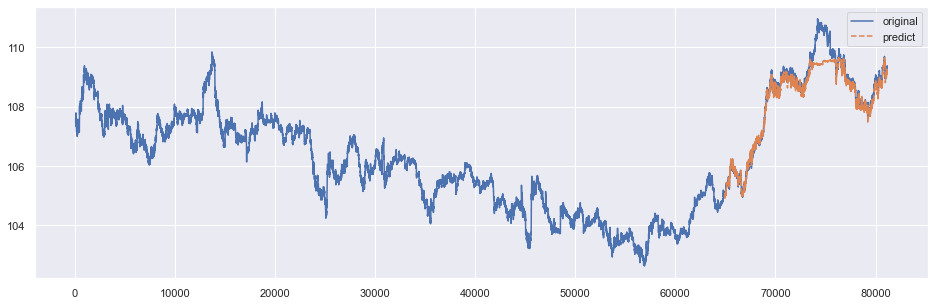

In [16]:
y_ = np.concatenate([np.array([None for i in range(len(y_train))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

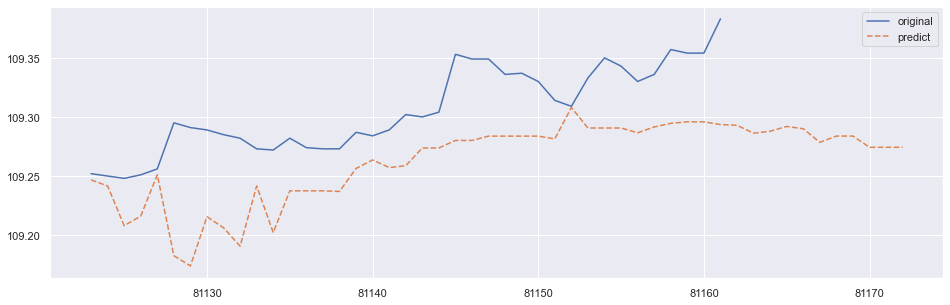

In [17]:
plt.figure(figsize=(16,5))
plt.plot(y[-50:], label='original')
plt.plot(y_[-50:], '--', label='predict')
plt.legend()

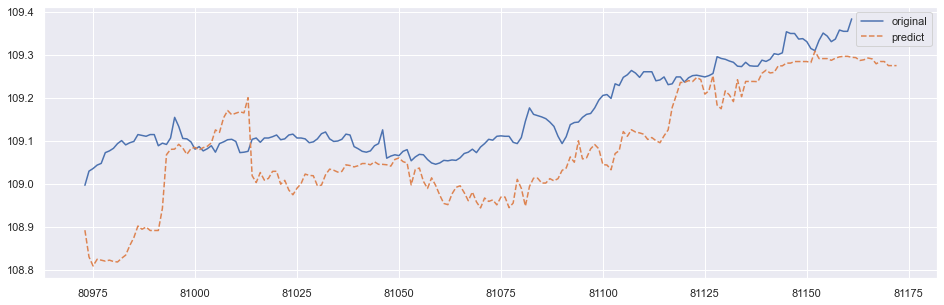

In [18]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:], label='original')
plt.plot(y_[-200:], '--', label='predict')
plt.legend()

In [19]:
import pickle

filename='model_m5.pkl'
pickle.dump(reg_cv_xgb.best_estimator_, open(filename, 'wb'))